#**Análisis y Recomendaciones para la Mejora del Desempeño Académico Mediante Clustering**

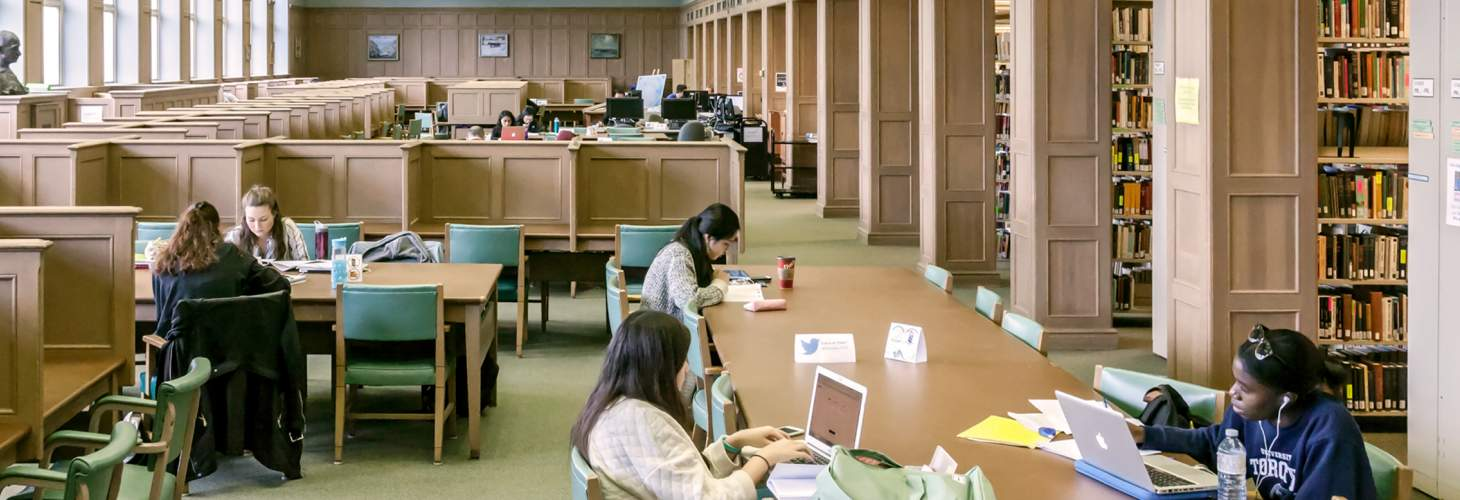

###**Contexto**

En los últimos años, ha habido un interés creciente en utilizar la ciencia de datos a nivel educativo, en colegios y especialmente en universidades; para analizar el rendimiento académico estudiantil y en función de los resultados obtenidos tomar decisiones
que beneficien a los estudiantes y a las instituciones.

El hecho de agrupar estudiantes en base a ciertas características es una tarea frecuente en los algoritmos de machine learning para ámbitos educativos. Una vez identificados esos grupos o clusters , los docentes o responsables de las áreas educativas pueden utilizar esa información para generar contenido personalizado, enfocarse en los temas a mejorar, tomar mejores decisiones etc.

El objetivo de este caso de estudio es encontrar grupos de estudiantes y vincularlos con su rendimiento académico que permitan sacar conclusiones y hacer recomendaciones sobre en qué áreas o exámenes debe concentrarse el esfuerzo no solo de los estudiantes sino de los propios docentes.

Las conclusiones de este estudio permitirán a los responsables educativos adoptar medidas para corregir o mejorar las áreas que necesiten más atención y sobre todo el nivel de aprendizaje de los estudiantes.


### **Dataset**

Los datos provienen de la Facultad de Ciencias Organizacionales de la Universidad de Belgrado, y comprende a 366 registros de estudiantes graduados y su rendimiento académico.

Los atributos incluyen el desempeño en los exámenes de primer año (11 atributos), calificación promedio, del estudiante después de la graduación, número de puntos en el examen de ingreso, sexo y región del país de origen del estudiante. 
El atributo del rendimiento académico se discretiza según la calificación promedio. Si la nota cae por debajo de 8 se clasifican como Bad, entre 8 y 9 se otorga Good y entre 9 y 10 Excellent. Este atributo no se usó en el proceso de clustering pero se utilizó para los análisis y la discusión de los resultados de la agrupación. 

El resumen de los atributos es el siguiente:




* **Sex**: Sexo del estudiante. Value: male/female. Type: binominal

* **Region**: Región del país de donde proviene ell estudiante.Type: nominal

* **Score on entrance qualification exam**: Puntaje obtenido en el examen de ingreso.         
Values: 40-100. 
Type: real

* **Grades at the first year of studies**: Notas de los 12 exámenes de primer año.     
Values: 6-10.    
Type: integer

* **Average grade**: Nota promedio al final de la graduación. Values: 6-10. Type: real

* **Students academic performance**: Evaluación del rendimiento académico al final de los Estudios. Values: *Bad*, *Good*, *Excellent*.Type; polynominal

El dataset se carga en Rapidminer para su tratamiento previo. 
Se identifican valores faltantes que se sustituyen por el promedio y se setea el Role batch al atributo Students_success (Students academic performance). Esto se hace para que el campo no intervenga en el algoritmo de clustering, pero sí en el análisis y visualización posterior.



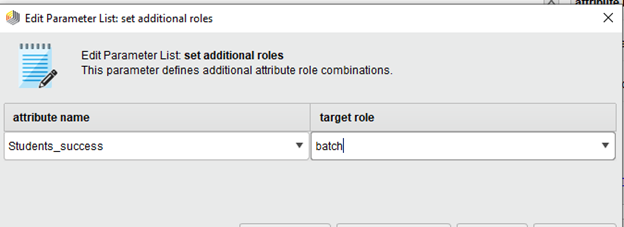

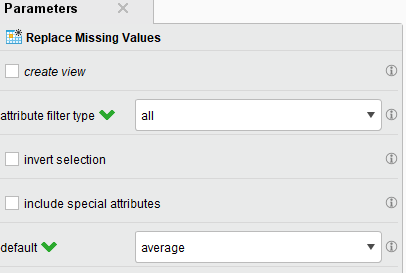

El objetivo es identificar patrones en la respuesta académica, sin tener en cuenta el sexo o el origen del estudiante. Por eso mediante el operador Select Attributes se eliminan esos dos atributos del dataset, invirtiendo la selección.

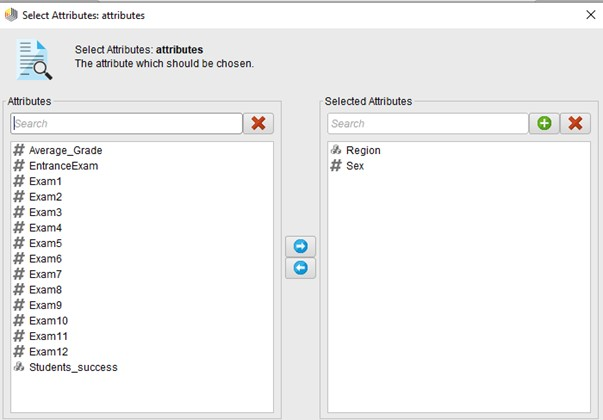

Finalmente, se observa una diferencia importante en los rangos de algunos atributos. Por ejemplo, la calificación del examen de ingreso toma valores entre 40 y 100, mientras que las calificaciones en los exámenes varían entre 6 y 10.
Para corregir esta diferencia se recurre a la normalización, La transformación se aplica a todos los atributos y los valores se convierten al rango 0,1.


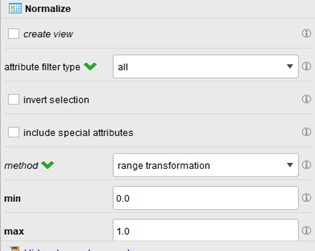

### **Ejecución**

Para el estudio se evalúan dos métodos de clustering basados en prototipos: k-Means y k-Medoids. 
La elección del k, es decir la cantidad de clusters a identificar, se realiza a través del índice Davies Bouldin, el cual mide la distancia intra cluster de cada uno. Aquel que tenga el índice menor es el elegido.
Por lo tanto, vamos variando el k y calculando la performance para obtener el índice en cada caso.


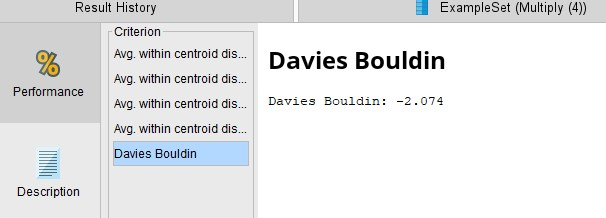

Luego graficamos los resultados y nos quedamos con el valor mínimo.

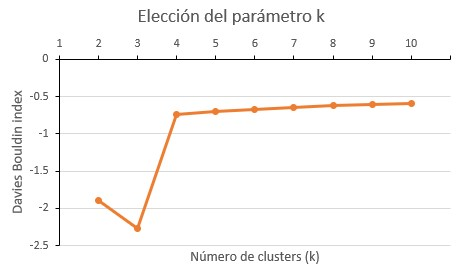

En ambos algoritmos, el k óptimo es 3
Para comparar la performance de ambos, también utilizamos el índice Davies Bouldin. 


El valor Davies Bouldin para k-Means es de 2.263


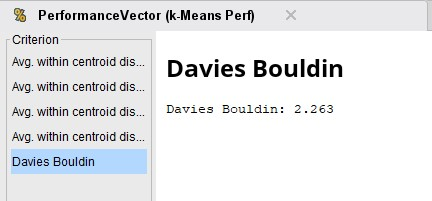

Mientras que para  k-Medoids es 2.074

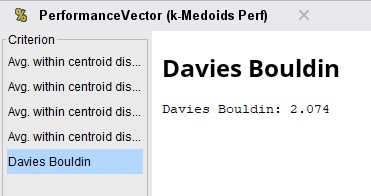




El método de clustering con menor valor y por tanto el elegido es k-Medoid. El criterio es cuanto menor es el índice menor es la distancia entre los puntos.
Junto con el operador de Performance, se agrega el componente Cluster Model Visualizer, el cual utiliza herramientas de visualización para capturar los detalles principales de modelos de clusters basados en centroide.


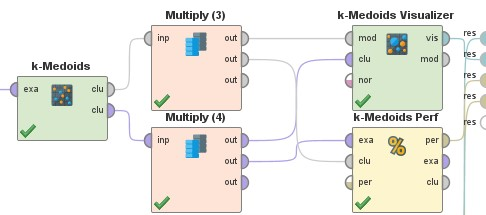

### **Análisis de los resultados**

En la siguiente gráfica se puede ver cómo se distribuyen los estudiantes en relación a las notas de los exámenes. En el eje de las x se tienen los valores del examen de ingreso, el promedio final de la carrera y las notas de los exámenes 1 al 12 de primer año.



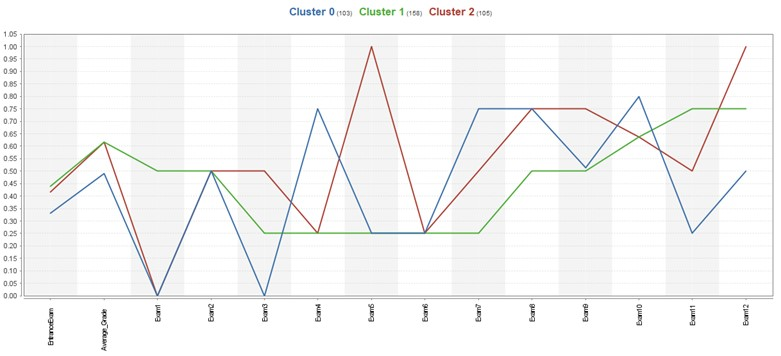

Se puede ver que los estudiantes que pertenecen al cluster 1 (línea verde) tuvieron los mejores resultados en el examen de ingreso y también por calificación promedio, a la vez que en el examen 1, examen 2  y examen 11. Al mismo tiempo, obtuvieron los peores resultados en los exámenes 4, 7, 8 y 9.

Los estudiantes que pertenecen al cluster 2 (línea roja) tuvieron resultados similares al grupo 1, en el examen de ingreso y en la nota media. Estos estudiantes obtuvieron los mejores resultados en el examen 3, examen 5, examen 8, examen 9 y examen 12.

Finalmente, los estudiantes que pertenecen al cluster 0 (línea azul) obtuvieron los peores resultados en el examen de ingreso y la nota media. Mostraron el mejor desempeño en el Examen 4, Examen 7 y Examen 10, pero los peores resultados en los exámenes 1, 3, y 11.

Con el fin de hacer algunas recomendaciones para mejorar el proceso de estudio, se hace un histograma para ver cómo se distribuyen los estudiantes de diferentes grupos por desempeño académico, es decir, la calificación final discretizada al final de los estudios.

La gráfica obtenida es la siguiente:


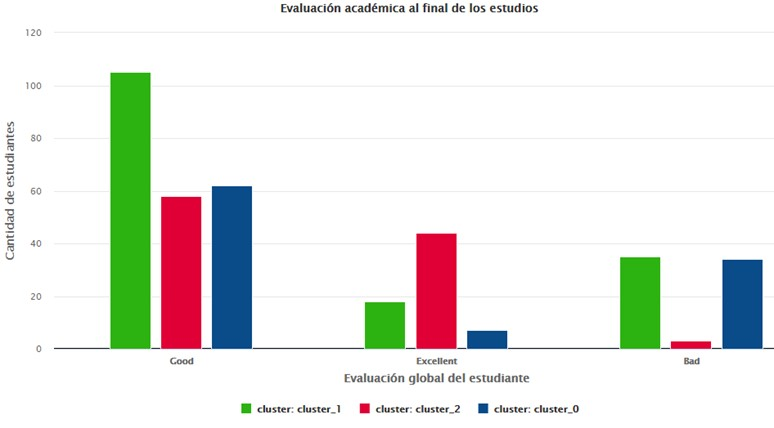

Podemos ver que la mayoría de los estudiantes que pertenecen a la clase Excellent están en el cluster 2. Además, los estudiantes del cluster 2 rara vez pertenecen a la clase Bad. Esto indica que el rendimiento Excellent depende de las buenas calificaciones en los exámenes 3, 5, 9 y 12
Se concluye entonces que estos exámenes deben ser considerados como importantes al inicio de los estudios.

Se podría llegar a una conclusión opuesta para el grupo 0, donde los estudiantes a menudo se clasifican como Bad o Good y raramente como Excellent. Obtuvieron los mejores resultados en los exámenes 4, 7 y 10, pero los peores en el 1, 3, y examen 11. Además, los estudiantes
del grupo 0 tienen la menor cantidad de puntos en el examen de ingreso en comparación con los otros dos clusters. Podemos concluir entonces que estos estudiantes no ingresan con buenos conocimientos previos y que deben hacer un esfuerzo adicional para lograr una buena performance al final de los estudios.

Finalmente, la mayoría de los estudiantes del cluster 1 pertenecen a la clase Good, y el el número de estudiantes Bad está en el mismo nivel que el cluster 0. Puede verse en la primer gráfica, que estos estudiantes tienen los peores resultados en los exámenes donde los estudiantes del grupo 0 alcanzan los valores más altos. Una vez más, esto indica que el rendimiento académico en el examen 3, examen 5, examen 9 y examen 12 tienen gran influencia sobre el rendimiento académico general de los estudiantes.

